<a href="https://colab.research.google.com/github/RFTDkin/soccer/blob/main/soccer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_2024 = pd.read_csv("/content/NED2024.csv")
df_2023 = pd.read_csv("/content/NED2023.csv")
df_2022 = pd.read_csv("/content/NED2022.csv")
df_2021 = pd.read_csv("/content/NED2021.csv")
df_2020 = pd.read_csv("/content/NED2020.csv")

# データを結合する
df = pd.concat([df_2024, df_2023, df_2022, df_2021, df_2020], ignore_index=True)
print(df.head())

  Div        Date   Time       HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  \
0  N1  09/08/2024  19:00      Groningen   NAC Breda     4     1   H     3   
1  N1  10/08/2024  15:30      Feyenoord   Willem II     1     1   D     1   
2  N1  10/08/2024  17:45       Nijmegen      Twente     1     2   A     1   
3  N1  10/08/2024  19:00    Almere City  AZ Alkmaar     0     1   A     0   
4  N1  10/08/2024  20:00  PSV Eindhoven    Waalwijk     5     1   H     3   

   HTAG  ... IWA  VCH  VCD  VCA  IWCH  IWCD  IWCA  VCCH  VCCD  VCCA  
0     0  ... NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1     0  ... NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2     1  ... NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3     1  ... NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4     0  ... NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 131 columns]


In [ ]:
print(df.isnull().sum())


Div           0
Date          0
Time          0
HomeTeam      0
AwayTeam      0
           ... 
IWCD        355
IWCA        355
VCCH        186
VCCD        186
VCCA        186
Length: 131, dtype: int64


In [ ]:
# 分析に必要な主要な列のみを選択
# Date: 日付, HomeTeam: ホームチーム, AwayTeam: アウェイチーム
# FTHG: フルタイムホームゴール数, FTAG: フルタイムアウェイゴール数, FTR: フルタイム結果 (H/D/A)
# HTHG: ハーフタイムホームゴール数, HTAG: ハーフタイムアウェイゴール数
df = df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG']]
df.head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG
0,09/08/2024,Groningen,NAC Breda,4,1,H,3,0
1,10/08/2024,Feyenoord,Willem II,1,1,D,1,0
2,10/08/2024,Nijmegen,Twente,1,2,A,1,1
3,10/08/2024,Almere City,AZ Alkmaar,0,1,A,0,1
4,10/08/2024,PSV Eindhoven,Waalwijk,5,1,H,3,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values('Date')
print(df.head())

           Date    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG
1104 2020-09-12  Heerenveen    Willem II     2     0   H     1     0
1105 2020-09-12      Zwolle    Feyenoord     0     2   A     0     1
1106 2020-09-12      Twente  For Sittard     2     0   H     1     0
1107 2020-09-13    FC Emmen    VVV Venlo     3     5   A     1     0
1108 2020-09-13    Heracles     Den Haag     2     0   H     0     0


In [ ]:
# 各チームの直近5試合の平均得点を計算し、攻撃力の指標として追加します。
df['HomeTeamGoalsAvg'] = df.groupby('HomeTeam')['FTHG'].rolling(5).mean().reset_index(0, drop=True)
df['AwayTeamGoalsAvg'] = df.groupby('AwayTeam')['FTAG'].rolling(5).mean().reset_index(0, drop=True)
print(df.tail(10))

          Date          HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
176 2025-01-28          Heracles      Groningen     1     1   D     1     0   
177 2025-01-31         NAC Breda       Heracles     1     1   D     1     0   
178 2025-02-01            Zwolle        Utrecht     3     3   D     2     0   
180 2025-02-01          Nijmegen  PSV Eindhoven     3     3   D     0     0   
179 2025-02-01        Heerenveen    For Sittard     2     2   D     1     1   
182 2025-02-02              Ajax      Feyenoord     2     1   H     1     0   
185 2025-02-02         Willem II     AZ Alkmaar     0     2   A     0     2   
184 2025-02-02  Sparta Rotterdam      Groningen     1     0   H     0     0   
181 2025-02-02       Almere City       Waalwijk     1     4   A     1     0   
183 2025-02-02   Go Ahead Eagles         Twente     2     2   D     1     0   

     HomeTeamGoalsAvg  AwayTeamGoalsAvg  
176               1.4               0.4  
177               1.4               1.0  
178 

In [ ]:
#試合結果 (FTR) を数値に変換し、勝率計算の準備をします。
df['WinResult'] = df['FTR'].map({'H': 1, 'D': 0.5, 'A': 0})


In [ ]:
# チームごとの勝率（直近5試合の移動平均）を計算する関数
def get_win_rate(team_col):
    return df.groupby(team_col)['WinResult'].rolling(5).mean().reset_index(0, drop=True)
# ホームチームとアウェイチームそれぞれの直近勝率を計算
df['HomeWinRate'] = get_win_rate('HomeTeam')
df['AwayWinRate'] = get_win_rate('AwayTeam')
# ホームチームの平均失点（相手の得点 FTAG の移動平均
df['HomeGoalsAgainst'] = df.groupby('HomeTeam')['FTAG'].rolling(5).mean().reset_index(0, drop=True)
# アウェイチームの平均失点（相手の得点 FTHG の移動平均）
df['AwayGoalsAgainst'] = df.groupby('AwayTeam')['FTHG'].rolling(5).mean().reset_index(0, drop=True)



In [ ]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HomeTeamGoalsAvg,AwayTeamGoalsAvg,WinResult,HomeWinRate,AwayWinRate,HomeGoalsAgainst,AwayGoalsAgainst
1104,2020-09-12,Heerenveen,Willem II,2,0,H,1,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1105,2020-09-12,Zwolle,Feyenoord,0,2,A,0,1,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1106,2020-09-12,Twente,For Sittard,2,0,H,1,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1107,2020-09-13,FC Emmen,VVV Venlo,3,5,A,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1108,2020-09-13,Heracles,Den Haag,2,0,H,0,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
df['HomeTeamGoalsAvg'] = df['HomeTeamGoalsAvg'].fillna(0)
df['AwayTeamGoalsAvg'] = df['AwayTeamGoalsAvg'].fillna(0)
df['HomeWinRate'] = df['HomeWinRate'].fillna(0)
df['AwayWinRate'] = df['AwayWinRate'].fillna(0)
df['HomeGoalsAgainst'] = df['HomeGoalsAgainst'].fillna(0)
df['AwayGoalsAgainst'] = df['AwayGoalsAgainst'].fillna(0)


In [ ]:
df.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HomeTeamGoalsAvg,AwayTeamGoalsAvg,WinResult,HomeWinRate,AwayWinRate,HomeGoalsAgainst,AwayGoalsAgainst
182,2025-02-02,Ajax,Feyenoord,2,1,H,1,0,2.2,1.8,1.0,0.9,0.5,0.8,1.8
185,2025-02-02,Willem II,AZ Alkmaar,0,2,A,0,2,1.6,1.6,0.0,0.4,0.2,1.6,0.8
184,2025-02-02,Sparta Rotterdam,Groningen,1,0,H,0,0,0.6,0.4,1.0,0.3,0.9,1.4,2.2
181,2025-02-02,Almere City,Waalwijk,1,4,A,1,0,1.2,1.8,0.0,0.2,0.6,2.6,1.6
183,2025-02-02,Go Ahead Eagles,Twente,2,2,D,1,0,2.8,1.2,0.5,0.9,0.7,0.8,2.4


In [ ]:
import requests

# オランダ・エールディヴィジ (League ID: 88, Season: 2023) の順位表を取得
url = "https://v3.football.api-sports.io/standings?league=88&season=2023"
headers = {"x-apisports-key": "1cda5265aab7976a5c032822aa3e5e06"}
response = requests.get(url, headers=headers)
data = response.json()


print(data.keys())


dict_keys(['get', 'parameters', 'errors', 'results', 'paging', 'response'])


In [ ]:
standings = data.get('response', [])
if standings:
    # 順位表データの抽出
    standings = standings[0]['league']['standings'][0]
    team_rankings = [[team['team']['name'], team['rank']] for team in standings]

    import pandas as pd
    df_rankings = pd.DataFrame(team_rankings, columns=['Team', 'Rank'])
    df_rankings.to_csv("team_rankings.csv", index=False)
    print("順位データのダウンロードに成功しました！")
else:
    print("APIから順位データが返されませんでした。APIリクエストを確認してください")


排名數據下載成功！


In [ ]:
df_rankings = pd.read_csv("/content/team_rankings.csv")
# 'Team'列を'HomeTeam'、'Rank'列を'HomeRank'にリネームして準備
df_rankings = df_rankings.rename(columns={'Team': 'HomeTeam', 'Rank': 'HomeRank'})


df = df.merge(df_rankings[['HomeTeam', 'HomeRank']], on='HomeTeam', how='left')

# 次にアウェイチーム用にリネーム
df_rankings = df_rankings.rename(columns={'HomeTeam': 'AwayTeam', 'HomeRank': 'AwayRank'})
df = df.merge(df_rankings[['AwayTeam', 'AwayRank']], on='AwayTeam', how='left')

print(df.tail())


           Date          HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
1405 2025-02-02              Ajax   Feyenoord     2     1   H     1     0   
1406 2025-02-02         Willem II  AZ Alkmaar     0     2   A     0     2   
1407 2025-02-02  Sparta Rotterdam   Groningen     1     0   H     0     0   
1408 2025-02-02       Almere City    Waalwijk     1     4   A     1     0   
1409 2025-02-02   Go Ahead Eagles      Twente     2     2   D     1     0   

      HomeTeamGoalsAvg  AwayTeamGoalsAvg  WinResult  HomeWinRate  AwayWinRate  \
1405               2.2               1.8        1.0          0.9          0.5   
1406               1.6               1.6        0.0          0.4          0.2   
1407               0.6               0.4        1.0          0.3          0.9   
1408               1.2               1.8        0.0          0.2          0.6   
1409               2.8               1.2        0.5          0.9          0.7   

      HomeGoalsAgainst  AwayGoalsAgainst  HomeRank

In [ ]:
df['HomeRank'] = df['HomeRank'].fillna(0)
df['AwayRank'] = df['AwayRank'].fillna(0)
print(df.tail())

           Date          HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
1405 2025-02-02              Ajax   Feyenoord     2     1   H     1     0   
1406 2025-02-02         Willem II  AZ Alkmaar     0     2   A     0     2   
1407 2025-02-02  Sparta Rotterdam   Groningen     1     0   H     0     0   
1408 2025-02-02       Almere City    Waalwijk     1     4   A     1     0   
1409 2025-02-02   Go Ahead Eagles      Twente     2     2   D     1     0   

      HomeTeamGoalsAvg  AwayTeamGoalsAvg  WinResult  HomeWinRate  AwayWinRate  \
1405               2.2               1.8        1.0          0.9          0.5   
1406               1.6               1.6        0.0          0.4          0.2   
1407               0.6               0.4        1.0          0.3          0.9   
1408               1.2               1.8        0.0          0.2          0.6   
1409               2.8               1.2        0.5          0.9          0.7   

      HomeGoalsAgainst  AwayGoalsAgainst  HomeRank

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# ホームチーム名とアウェイチーム名を数値に変換
df['HomeTeam'] = encoder.fit_transform(df['HomeTeam'])
df['AwayTeam'] = encoder.fit_transform(df['AwayTeam'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 学習に使用する特徴量のリスト
features = ['HomeTeam', 'AwayTeam', 'HomeTeamGoalsAvg', 'AwayTeamGoalsAvg', 'HomeWinRate', 'AwayWinRate', 'HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeRank', 'AwayRank']
# 特徴量を正規化（0〜1の範囲に変換）
df[features] = scaler.fit_transform(df[features])


In [ ]:
print(df.tail())

           Date  HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
1405 2025-02-02  0.041667  0.291667     2     1   H     1     0   
1406 2025-02-02  0.958333  0.000000     0     2   A     0     2   
1407 2025-02-02  0.666667  0.416667     1     0   H     0     0   
1408 2025-02-02  0.083333  0.916667     1     4   A     1     0   
1409 2025-02-02  0.375000  0.708333     2     2   D     1     0   

      HomeTeamGoalsAvg  AwayTeamGoalsAvg  WinResult  HomeWinRate  AwayWinRate  \
1405          0.423077          0.346154        1.0          0.9          0.5   
1406          0.307692          0.307692        0.0          0.4          0.2   
1407          0.115385          0.076923        1.0          0.3          0.9   
1408          0.230769          0.346154        0.0          0.2          0.6   
1409          0.538462          0.230769        0.5          0.9          0.7   

      HomeGoalsAgainst  AwayGoalsAgainst  HomeRank  AwayRank  
1405          0.181818          0.409091  0.277

In [ ]:
from sklearn.model_selection import train_test_split
# 特徴量 (入力データ)
X = df[['HomeTeam', 'AwayTeam', 'HomeTeamGoalsAvg', 'AwayTeamGoalsAvg', 'HomeWinRate', 'AwayWinRate','HomeGoalsAgainst', 'AwayGoalsAgainst', 'HomeRank', 'AwayRank']]
y = df['WinResult']  # 目的変数 (予測対象: 試合結果 1=ホーム勝, 0.5=引分, 0=アウェイ勝)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
from tensorflow.keras.utils import to_categorical

# WinResult (0, 0.5, 1) をカテゴリカルデータに変換
# 注意: to_categorical は通常 0, 1, 2 の整数入力を期待します。
# もしエラーが出る場合は、yの値を 0->0, 0.5->1, 1->2 に変換する処理が必要です。
y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)


In [ ]:
X_train.head()

,HomeTeam,AwayTeam,HomeTeamGoalsAvg,AwayTeamGoalsAvg,HomeWinRate,AwayWinRate
1104,0.458333,0.958333,0.0,0.0,0.0,0.0
1105,1.000000,0.291667,0.0,0.0,0.0,0.0
1106,0.708333,0.333333,0.0,0.0,0.0,0.0
1107,0.250000,0.791667,0.0,0.0,0.0,0.0
1108,0.500000,0.166667,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np

# データをNumPy配列に変換
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# LSTMには3次元の入力が必要です: (サンプル数, タイムステップ, 特徴量)
# ここではタイムステップ = 1 として形状を変更
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("LSTM Input Shape:", X_train.shape)


LSTM Input Shape: (1128, 1, 10)


In [ ]:
print(X_train)

[[[0.45833333 0.95833333 0.         0.         0.         0.        ]]

 [[1.         0.29166667 0.         0.         0.         0.        ]]

 [[0.70833333 0.33333333 0.         0.         0.         0.        ]]

 ...

 [[0.875      0.58333333 0.11538462 0.42307692 0.         0.5       ]]

 [[0.375      0.91666667 0.23076923 0.07692308 0.4        0.9       ]]

 [[0.83333333 0.70833333 0.11538462 0.26923077 0.2        0.4       ]]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
# LSTMモデルの構築

model = Sequential([
    # 第1層: LSTM (ユニット数128), 活性化関数ReLU, シーケンスを保持
    LSTM(128, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[2])),
    BatchNormalization(),  # バッチ正規化: 学習の収束を早め、安定させる
    Dropout(0.3), # ドロップアウト: 過学習を防ぐ

    # 第2層: LSTM (ユニット数64)
    LSTM(64, activation='relu', return_sequences=True),

    BatchNormalization(),
    Dropout(0.3),
    # 第3層: LSTM (ユニット数32)
    LSTM(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    # 出力層: 3クラス分類 (ホーム勝/引分/アウェイ勝) なので softmax
    Dense(3, activation='softmax')
])
# モデルのコンパイル (最適化アルゴリズム: Adam, 損失関数: カテゴリカル交差エントロピー)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 1, 128)              │          71,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,987 (523.39 KB)

 Trainable params: 133,539 (521.64 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# モデルの学習 (エポック数50, バッチサイズ32)
# validation_data を指定して、テストデータでの性能も同時にモニタリング
history = model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_test, y_test_categorical))


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.3672 - loss: 1.4045 - val_accuracy: 0.5461 - val_loss: 1.0484
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5771 - loss: 0.9856 - val_accuracy: 0.5461 - val_loss: 1.0043
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6465 - loss: 0.8906 - val_accuracy: 0.5461 - val_loss: 0.9657
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6905 - loss: 0.8316 - val_accuracy: 0.5461 - val_loss: 0.9281
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6973 - loss: 0.7487 - val_accuracy: 0.5461 - val_loss: 0.8957
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7496 - loss: 0.7151 - val_accuracy: 0.5461 - val_loss: 0.8710
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7457 - loss: 0.6595 - val_accuracy: 0.5461 - val_loss: 0.8469
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7642 - loss: 0.6732 - val_accuracy: 0.5461 - 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"モデル精度: {accuracy * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8018 - loss: 0.4602
模型準確度: 78.72%


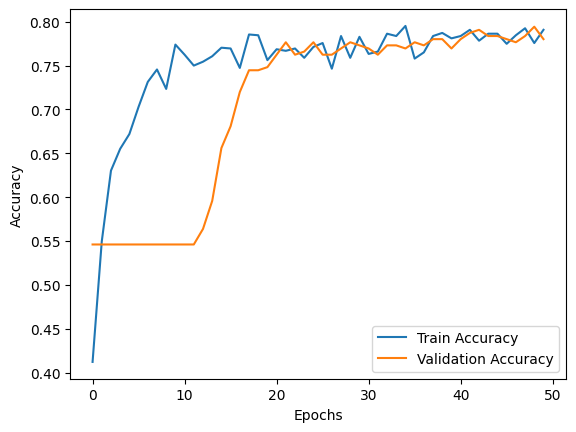

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
